The task at hand has been tackled through the framework of supervised machine learning, employing a classification approach. **Specifically, a logistic regression model has been utilized to address the problem statement.**
In supervised machine learning, the data is labeled, meaning it's accompanied by a target variable that the model aims to predict based on input features. Classification is a type of supervised learning where the goal is to predict the categorical class labels of new instances based on past observations. **Logistic regression is a statistical method used for modeling binary dependent variables.** It estimates the probability that a given instance belongs to a particular category. *Despite its name, logistic regression is used for classification rather than regression.*

In [1]:
import pandas as pd #to load data
import numpy as np #to manipualte and organise
import matplotlib.pyplot as plt #for data visualisation
import seaborn as sns
#import plotly.express as px
from sklearn.model_selection import train_test_split #to split the data for training and validation
from sklearn.preprocessing import StandardScaler #to standardise data
from sklearn.linear_model import LogisticRegression #model to be used
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
#to assess the model
print("DONE IMPORTING LIBRARIES!")

DONE IMPORTING LIBRARIES!


# --DATA LOADING--

In [2]:
data_frame=pd.read_csv("./data_bc.csv",index_col='id')
data_frame.info()
    #we have to change the data type of Diagnosis column
#data_frame.head()
#data_frame.isnull().sum()
    #we have to drop the null column -Part of data cleaning

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

--UNDERSTANDING THE DATA--

In [3]:
data_frame.shape
#to know number of rows and columns

(569, 32)

In [4]:
data_frame.nunique()
#to find number of possible unique values

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed: 32                  0
dtype: i

# ORGANISING AND CLEANING THE DATA

In [5]:
data_frame['diagnosis']=data_frame['diagnosis'].map({"M":0,'B':1})
#data_frame.info()
#data_frame.tail()
#data_frame.isnull().sum()
print(data_frame.shape)

(569, 32)


diagnosis
1    357
0    212
Name: count, dtype: int64


<Axes: xlabel='diagnosis', ylabel='count'>

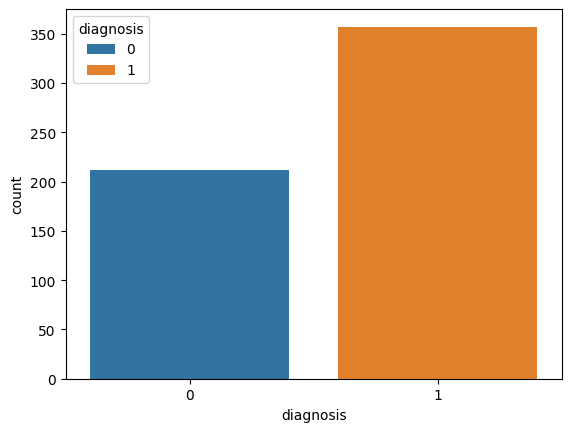

In [6]:
print(data_frame['diagnosis'].value_counts())
sns.countplot(x='diagnosis', hue='diagnosis',data=data_frame)
#the data has almost equal instances of both the categories and hence its balanced

In [7]:
data_frame.dropna(inplace=True,axis=1)
data_frame.shape
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [8]:
data_frame.describe()
#beacuse the features are varying in a large range of values we have to scale the features so that
#logistic regressor works better

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


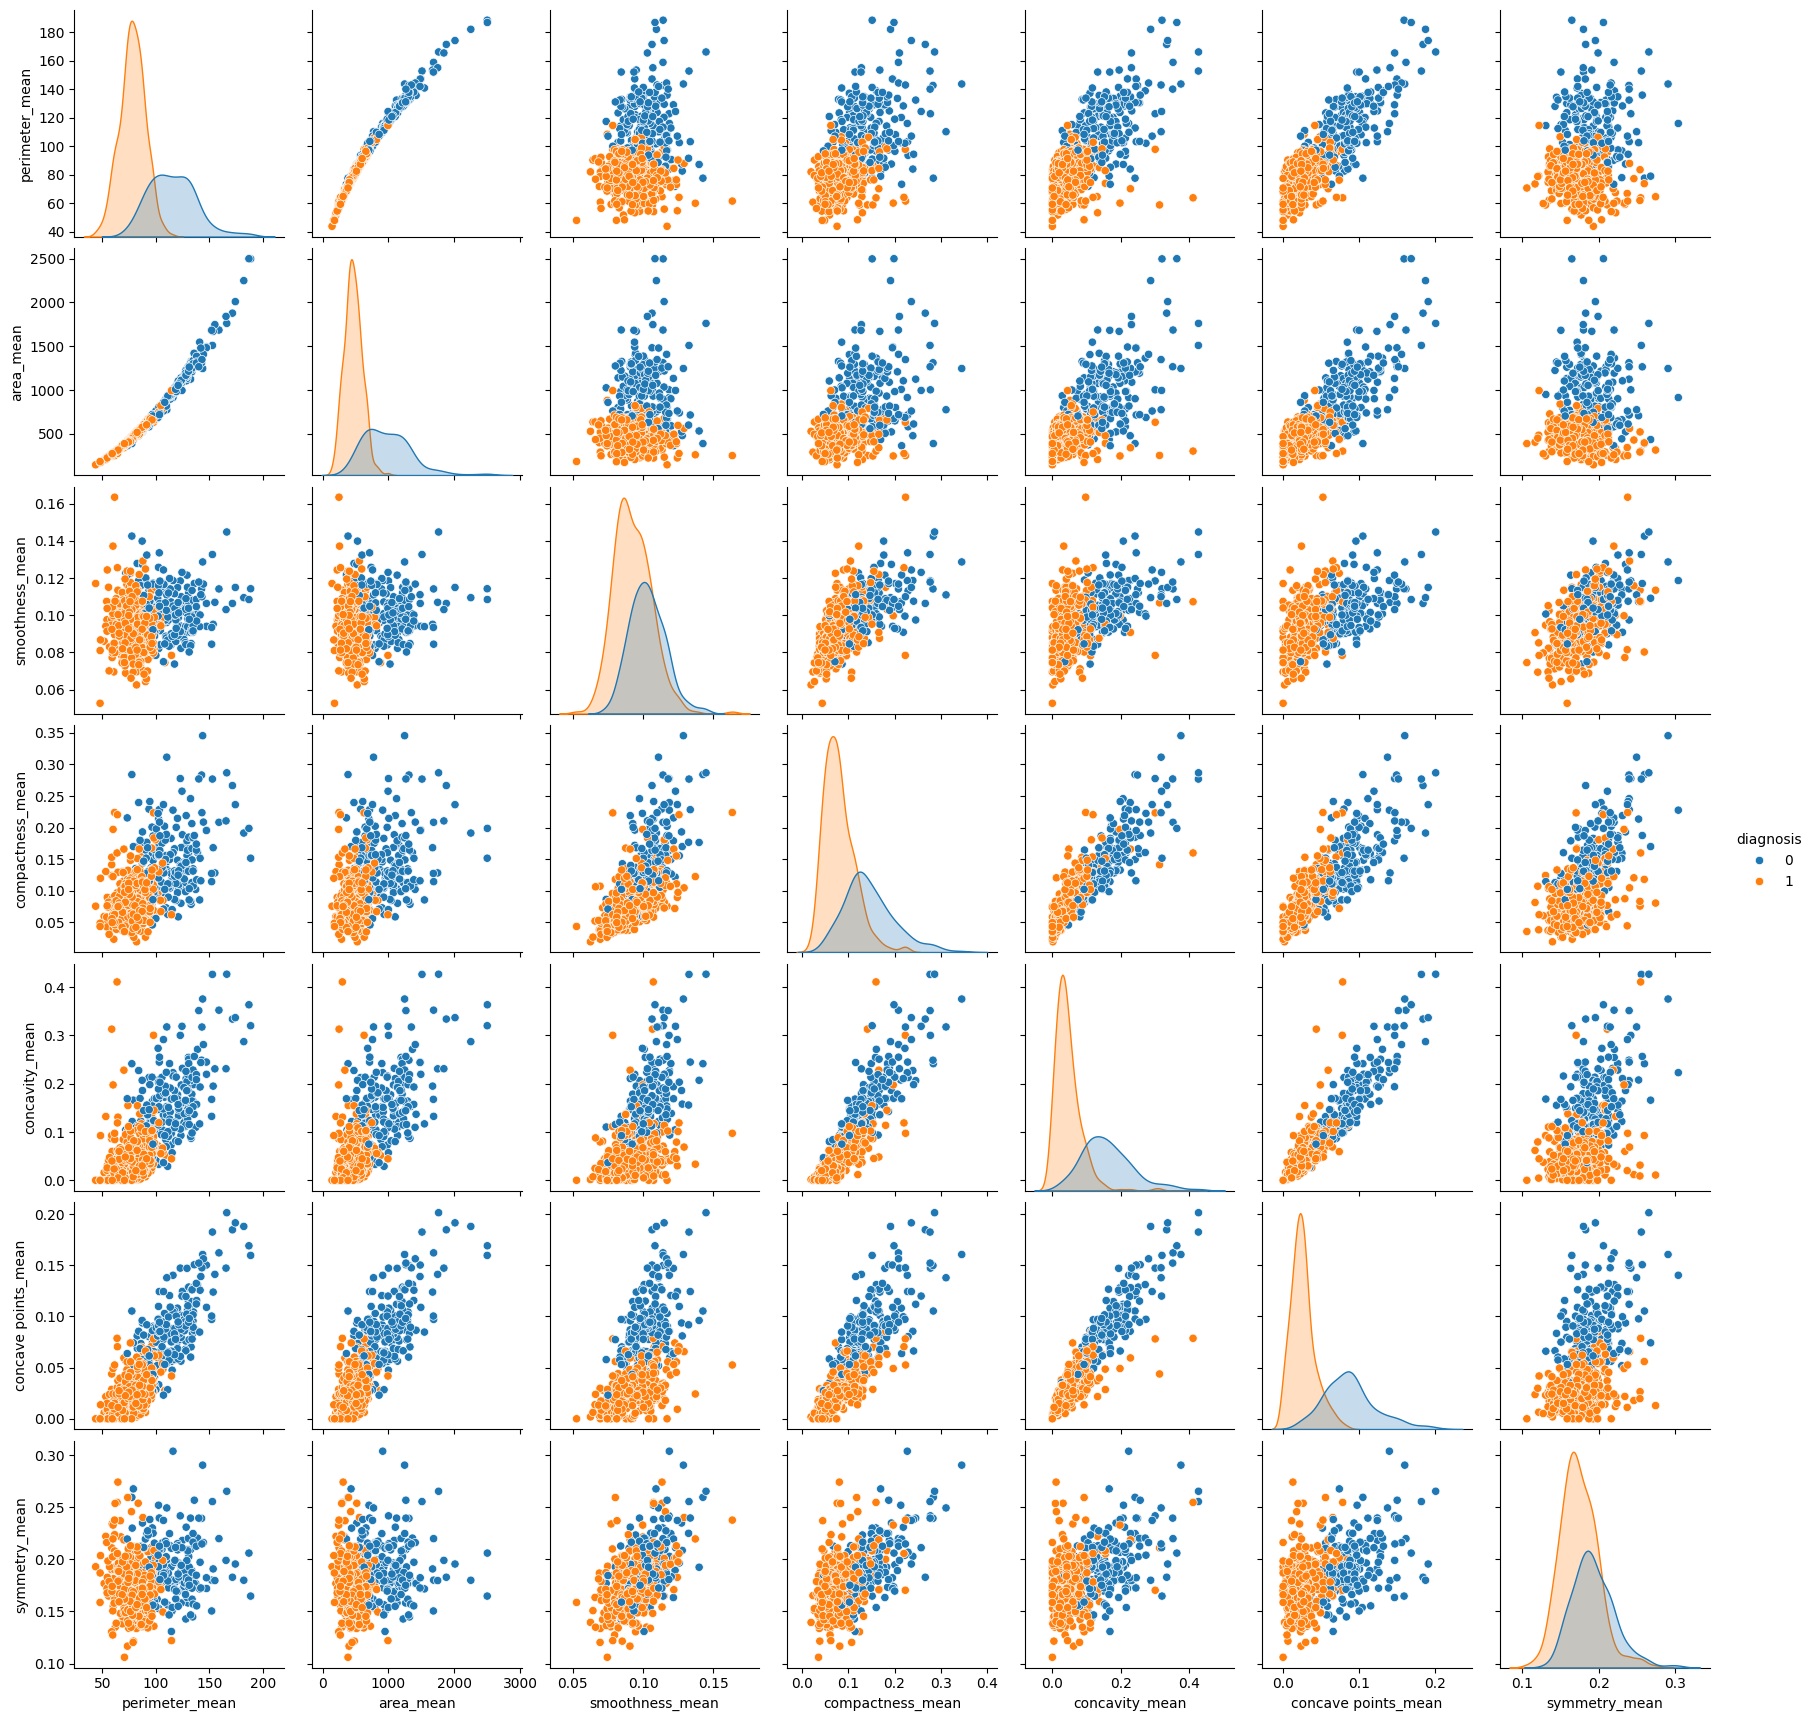

In [9]:
subset = data_frame.iloc[:, 3:10]
subset['diagnosis'] = data_frame['diagnosis']

# Using sns.pairplot 
sns.pairplot(subset, hue='diagnosis')

# Display the plot
plt.show()

# FEEDING THE DATA TO THE MODEL

In [10]:
# Prepare features and target
X = data_frame.iloc[:, 2:].values
y = data_frame['diagnosis'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Standardize the data (Feature Scaling)
#this is done so that the gradient descent works better
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [11]:
# Train the Logistic Regression model (best suited in this case)
data_model = LogisticRegression(max_iter=10000)  
# Increased max_iter to ensure convergence from gradient descent
data_model.fit(X_train, y_train)

# Check the score on the training data
train_score = data_model.score(X_train, y_train)
print("Training Score:", train_score)

Training Score: 0.9846153846153847


--CHECKING THE ACCURACY OF THE MODEL--

In [14]:
y_pred=data_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#number of correctly predicted values to total number of predictions made
precision=precision_score(y_test,y_pred)
#number of true positive predictons to total positive predictions 
recall=recall_score(y_test,y_pred)
#ratio of the number of true positive  instances to the sum of true positive and false negative  instances
f1= f1_score(y_test, y_pred)
# overall performance of a classification model, it is the harmonic mean of precision and recall
conf_matrix= confusion_matrix(y_test, y_pred)
'''
[[True positve,false positive],
[false negative,true negative]]
'''

'''print("Accuracy Score: ",accuracy)
print("Precision: ",precision)
print("Recall", recall)
print("F1 score: ",f1)'''
print("Confusion Matrix: \n",conf_matrix)

print("Classification Report: \n", classification_report(y_test,y_pred))

Confusion Matrix: 
 [[38  2]
 [ 0 74]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



--PREDICT THE NATURE FOR NEW DATA--

In [13]:
data_str = "923465 10.82 24.21 68.89 361.6 0.08192 0.06602 0.01548 0.00816 0.1976 0.06328 0.5196 1.918 3.564 33 0.008263 0.0187 0.01277 0.005917 0.02466 0.002977 13.03 31.45 83.9 505.6 0.1204 0.1633 0.06194 0.03264 0.3059 0.07626"

# Split the string into a list and convert to numpy array
data_list = data_str.split()
new_data = np.array(data_list[1:30], dtype=float).reshape(1, -1)  # Reshape to (1, -1) for a single sample
new_data_standardized = st.transform(new_data)
prediction = data_model.predict(new_data_standardized)

# Print the prediction
if(prediction==0):
    print("M")
else:
    print("B")

M
